In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dataset/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dataset',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
250/250 [==============================] - 953s 3s/step - loss: 2.3605 - accuracy: 0.5648 - val_loss: 1.5608 - val_accuracy: 0.4019
Epoch 2/10
250/250 [==============================] - 68s 269ms/step - loss: 0.7460 - accuracy: 0.5775 - val_loss: 0.9304 - val_accuracy: 0.3301
Epoch 3/10
250/250 [==============================] - 52s 206ms/step - loss: 0.6333 - accuracy: 0.6504 - val_loss: 0.9940 - val_accuracy: 0.5948
Epoch 4/10
250/250 [==============================] - 53s 211ms/step - loss: 0.5926 - accuracy: 0.6960 - val_loss: 1.2704 - val_accuracy: 0.3651
Epoch 5/10
250/250 [==============================] - 68s 272ms/step - loss: 0.5622 - accuracy: 0.7051 - val_loss: 0.9135 - val_accuracy: 0.4431
Epoch 6/10
250/250 [==============================] - 51s 203ms/step - loss: 0.5077 - accuracy: 0.7494 - val_loss: 1.6222 - val_accuracy: 0.4350
Epoch 7/10
250/250 [==============================] - 52s 206ms/step - loss: 0.4354 - accuracy: 0.7871 - val_loss: 2.5684 - val_accu

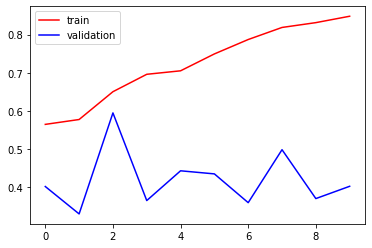

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [13]:
import cv2

In [14]:
test_img = cv2.imread('/content/drive/MyDrive/cat1.jpg')

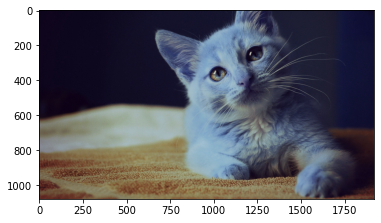

In [15]:
plt.imshow(test_img)

In [16]:
test_img.shape

(1080, 1920, 3)

In [17]:
test_img = cv2.resize(test_img,(256,256))

In [18]:
test_input = test_img.reshape((1,256,256,3))

In [19]:
model.predict(test_input)

1/1 [==============================] - 0s 259ms/step


array([[0.]], dtype=float32)